In [2]:
import oss2
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
with open("../aliyun_key.json" ,'r') as key:
    AccessKeyDict=json.loads(key.read())
AccessKeyId=AccessKeyDict["AccessKeyId"]
AccessKeySecret=AccessKeyDict["AccessKeySecret"]
auth = oss2.Auth(AccessKeyId, AccessKeySecret)
bucket = oss2.Bucket(auth, 'https://oss-cn-shanghai.aliyuncs.com', 'ocr-yjs')
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkcore.auth.credentials import AccessKeyCredential
from aliyunsdkcore.auth.credentials import StsTokenCredential
credentials = AccessKeyCredential(AccessKeyId, AccessKeySecret)
client = AcsClient(region_id='cn-shanghai', credential=credentials)
import seaborn as sns

In [3]:
"""
https://help.aliyun.com/document_detail/183579.html
厨师帽检测
"""

from aliyunsdkfacebody.request.v20191230.DetectChefCapRequest import DetectChefCapRequest

request = DetectChefCapRequest()
request.set_accept_format('json')

filepath="images/厨师.jpg"
with open(filepath, 'rb') as fileobj:
    bucket.put_object(filepath, fileobj)
url="https://ocr-yjs.oss-cn-shanghai.aliyuncs.com/"+filepath
request.set_ImageURL(url)

response = client.do_action_with_exception(request)
response=json.loads(str(response, encoding='utf-8'))
print(response)

{'RequestId': '1126B12E-7F31-535A-8E26-F2041374DF0F', 'Data': {'Elements': [{'Category': 'chefcap', 'Confidence': 0.8461400866508484, 'Box': [0.42125, 0.0, 0.7225, 0.46387832699619774]}]}}


In [8]:
Data=response["Data"]['Elements'][0]
print(Data)

{'Category': 'chefcap', 'Confidence': 0.8461400866508484, 'Box': [0.42125, 0.0, 0.7225, 0.46387832699619774]}


In [ ]:
"""
Box	List	[0.1,0.08,0.15,0.21]	
厨师帽的位置归一化坐标[x1,y1,x2,y2]，左上角点(x1,y1)，右下角点(x2，y2)。
Category	String	chefcap	
    识别结果类别，包含head，chefcap，untreated三类。
        head：指模型判定该人员未佩戴厨师帽。
        chefcap:：指模型判定该人员已佩戴厨师帽。
        untreated：指由于图片模糊、人头过小、被局部遮挡等原因，模型未对该人头进行判断。
Confidence	Float	0.6817094683647156 识别结果置信度。
"""

In [16]:
shape=plt.imread(filepath).shape
shape

(526, 800, 3)

In [31]:
width=shape[0]
height=shape[1]

In [33]:
left=(int(Box[0]*height),int(Box[1]*width))
bottom=(int(Box[2]*height),int(Box[3]*width))


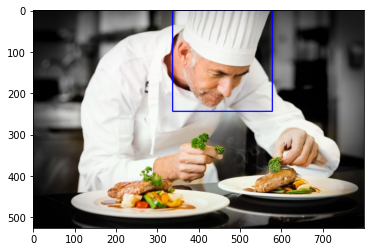

In [35]:
img=plt.imread(filepath)
cv2.rectangle(img,left,bottom,(0,0,255),2)
plt.imshow(img)